# FISH FRY COUNTER PREPROCESSING
Developed by: John Markton M. Olarte

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Exploration

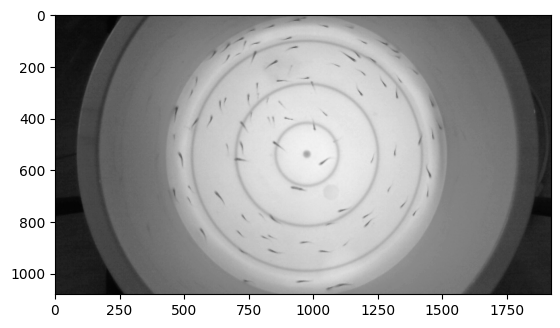

In [2]:
sample_img = cv.imread('./IMAGES/100/my_photo-1.jpg')
sample_img = cv.cvtColor(sample_img, cv.COLOR_BGR2GRAY)
plt.imshow(sample_img, cmap='gray')

In [3]:
def crop_img(img):
    img_centerX = img.shape[1] // 2
    img_centerY = img.shape[0] // 2

    # Initialize mask to use
    mask = np.zeros(img.shape, dtype=np.uint8)

    # Crop the image
    region_to_cut = cv.ellipse(mask, (img_centerX, img_centerY), (547, 547), 0, 0, 360, 255, -1)
    cropped_img = cv.bitwise_or(img, img, mask=region_to_cut)
    return cropped_img[:, img_centerX-600:img_centerX+600]

In [4]:
def invert_img(img):
    return cv.bitwise_not(img)

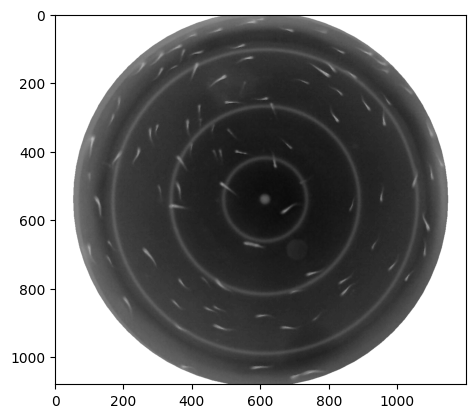

In [5]:
"""
    Crop the image to exclude the reflection of the fry in the side walls of the bin
    Invert the image to help reduce the impact of salt-and-pepper noise, without using any blurring methods

    Gaussian blur was not utilized since it excludes the thin fry from being detected.
"""
sample_img_cropped = crop_img(sample_img)
sample_img_inv = invert_img(sample_img_cropped)
plt.imshow(sample_img_inv, cmap='gray')

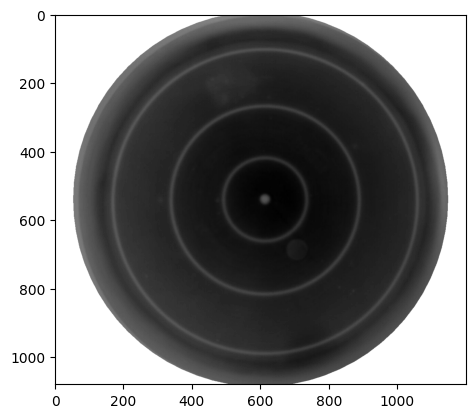

In [6]:
# Processing the background image
bg_img = cv.imread('./IMAGES/100/background.jpg')
bg_img = cv.cvtColor(bg_img, cv.COLOR_BGR2GRAY)
bg_img_cropped = crop_img(bg_img)
bg_img_inv = invert_img(bg_img_cropped)
plt.imshow(bg_img_inv, cmap='gray')

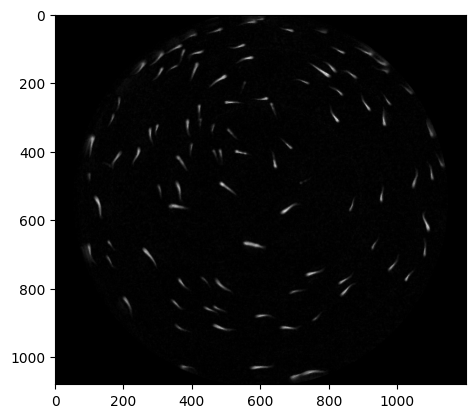

In [7]:
# Removing the background image data
diff_img = cv.absdiff(sample_img_inv, bg_img_inv)
plt.imshow(diff_img, cmap='gray')

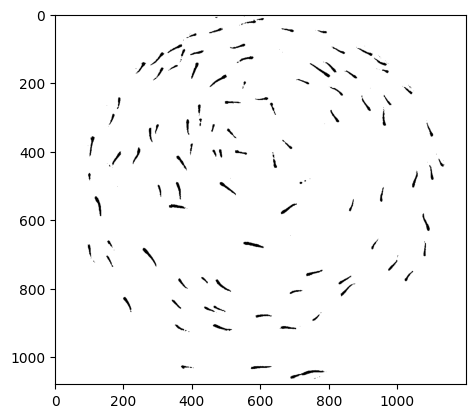

In [8]:
"""
    Threshold using adaptive gaussian threshold method, this was used since there are different 
        brightness level of the fry based on their depth in the container.
"""
thresh = cv.adaptiveThreshold(invert_img(diff_img), 256, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 31,5)
plt.imshow(thresh, cmap='gray')

In [9]:
def count_black_pixels(thresh):
    return np.count_nonzero(thresh == 0)

In [10]:
# Count the  black pixels
print(count_black_pixels(thresh))

20299


224


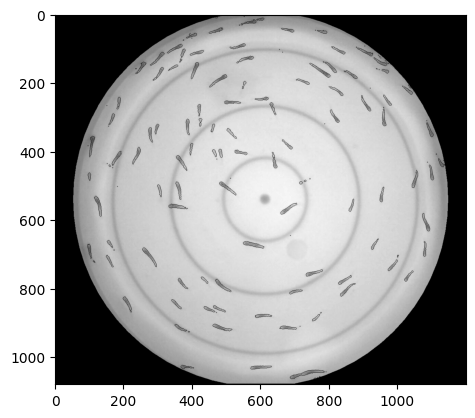

In [11]:
# Contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img = cv.drawContours(sample_img_cropped, contours, -1, (0, 255, 0), 1)
plt.imshow(img, cmap='gray')
print(len(contours))

## Create a dataframe for training (100, 200, 300, and 400)

In [12]:
import os
import pandas as pd

In [13]:
# Path to the images (100)
path = './IMAGES/100/'
list_images_100 = [f for f in os.listdir(path) if f.startswith('my_photo')]
list_paths_100 = [path + f for f in list_images_100]

# Path to the images (200)
path = './IMAGES/200/'
list_images_200 = [f for f in os.listdir(path) if f.startswith('my_photo')]
list_paths_200 = [path + f for f in list_images_200]

# Path to the images (300)
path = './IMAGES/300/'
list_images_300 = [f for f in os.listdir(path) if f.startswith('my_photo')]
list_paths_300 = [path + f for f in list_images_300]

# Path to the images (400)
path = './IMAGES/400/'
list_images_400 = [f for f in os.listdir(path) if f.startswith('my_photo')]
list_paths_400 = [path + f for f in list_images_400]

In [14]:
df = pd.DataFrame(columns=['black_pixels', 'contours', 'label'])
os.makedirs('./exported_df', exist_ok=True)

In [15]:
# Image with 100
df_100 = df.copy()
for img_path in list_paths_100:
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_cropped = crop_img(img)
    img_inv = invert_img(img_cropped)
    diff_img = cv.absdiff(img_inv, bg_img_inv)
    thresh = cv.adaptiveThreshold(invert_img(diff_img), 256, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 31,5)
    black_pixels = count_black_pixels(thresh)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    df_100 = pd.concat([df_100, pd.DataFrame({'black_pixels': [black_pixels], 'contours': [len(contours)], 'label': [100]})], ignore_index=True)

df_100.to_csv('./exported_df/df_100.csv', index=False)

In [16]:
# Image with 200
df_200 = df.copy()
for img_path in list_paths_200:
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_cropped = crop_img(img)
    img_inv = invert_img(img_cropped)
    diff_img = cv.absdiff(img_inv, bg_img_inv)
    thresh = cv.adaptiveThreshold(invert_img(diff_img), 256, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 31,5)
    black_pixels = count_black_pixels(thresh)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    df_200 = pd.concat([df_200, pd.DataFrame({'black_pixels': [black_pixels], 'contours': [len(contours)], 'label': [200]})], ignore_index=True)

df_200.to_csv('./exported_df/df_200.csv', index=False)

In [17]:
# Image with 300
df_300 = df.copy()
for img_path in list_paths_300:
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_cropped = crop_img(img)
    img_inv = invert_img(img_cropped)
    diff_img = cv.absdiff(img_inv, bg_img_inv)
    thresh = cv.adaptiveThreshold(invert_img(diff_img), 256, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 31,5)
    black_pixels = count_black_pixels(thresh)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    df_300 = pd.concat([df_300, pd.DataFrame({'black_pixels': [black_pixels], 'contours': [len(contours)], 'label': [300]})], ignore_index=True)

df_300.to_csv('./exported_df/df_300.csv', index=False)

In [18]:
# Image with 400
df_400 = df.copy()
for img_path in list_paths_400:
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_cropped = crop_img(img)
    img_inv = invert_img(img_cropped)
    diff_img = cv.absdiff(img_inv, bg_img_inv)
    thresh = cv.adaptiveThreshold(invert_img(diff_img), 256, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 31,5)
    black_pixels = count_black_pixels(thresh)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    df_400 = pd.concat([df_400, pd.DataFrame({'black_pixels': [black_pixels], 'contours': [len(contours)], 'label': [400]})], ignore_index=True)

df_400.to_csv('./exported_df/df_400.csv', index=False)

In [19]:
print('Minimum black_pixels: ', df_100['black_pixels'].min(), df_200['black_pixels'].min(), df_300['black_pixels'].min(), df_400['black_pixels'].min())
print('Maximum black_pixels: ', df_100['black_pixels'].max(), df_200['black_pixels'].max(), df_300['black_pixels'].max(), df_400['black_pixels'].max())
print('Minimum contours: ', df_100['contours'].min(), df_200['contours'].min(), df_300['contours'].min(), df_400['contours'].min())
print('Maximum contours: ', df_100['contours'].max(), df_200['contours'].max(), df_300['contours'].max(), df_400['contours'].max())

Minimum black_pixels:  19963 62611 77774 102196
Maximum black_pixels:  21307 67718 87826 110531
Minimum contours:  176 1243 1238 1409
Maximum contours:  228 1436 1580 1590
